In [1]:
import pandas as pd
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('./Complete-data.csv')

X = df.drop(columns=['Landslide'])
y = df['Landslide']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
clf = SVC(random_state=1)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

base_accuracy = accuracy_score(y_test, pred)
print("Base Model Accuracy:", base_accuracy)

Base Model Accuracy: 0.7901234567901234


In [4]:
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

In [5]:
svm_grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

print("Best Params:", svm_grid_search.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Params: {'C': 10, 'gamma': 0.01, 'kernel': 'poly'}


In [6]:
best_svm_model = svm_grid_search.best_estimator_
y_pred_best = best_svm_model.predict(X_test)

best_accuracy = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", best_accuracy)

Best Model Accuracy: 0.7777777777777778


In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

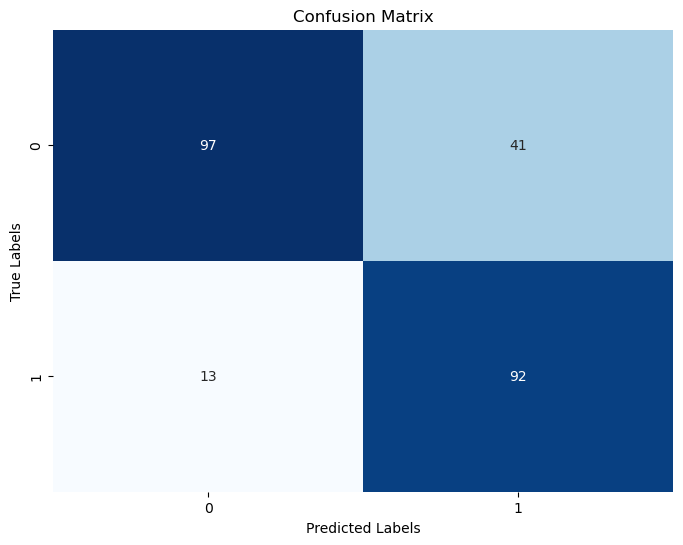

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [9]:
import pickle

best_svm_model = svm_grid_search.best_estimator_

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(best_svm_model, f)